<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 4: Classification with Yelp, SGD, OOP

## Yelp

---

In this project you will be investigating a small version of the [Yelp challenge dataset](https://www.yelp.com/dataset_challenge). You'll practice using classification algorithms, cross-validation, gridsearching – all that good stuff.

---

### The data

There are 5 individual .csv files that have the information, zipped into .7z format like with the SF data last project. The dataset is located in your datasets folder:

    DSI-SF-2/datasets/yelp_arizona_data.7z

The columns in each are:

    businesses_small_parsed.csv
        business_id: unique business identifier
        name: name of the business
        review_count: number of reviews per business
        city: city business resides in
        stars: average rating
        categories: categories the business falls into (can be one or multiple)
        latitude
        longitude
        neighborhoods: neighborhoods business belongs to
        variable: "property" of the business (a tag)
        value: True/False for the property
        
    reviews_small_nlp_parsed.csv
        user_id: unique user identifier
        review_id: unique review identifier
        votes.cool: how many thought the review was "cool"
        business_id: unique business id the review is for
        votes.funny: how many thought the review was funny
        stars: rating given
        date: date of review
        votes.useful: how many thought the review was useful
        ... 100 columns of counts of most common 2 word phrases that appear in reviews in this review
        
    users_small_parsed.csv
        yelping_since: signup date
        compliments.plain: # of compliments "plain"
        review_count: # of reviews:
        compliments.cute: total # of compliments "cute"
        compliments.writer: # of compliments "writer"
        compliments.note: # of compliments "note" (not sure what this is)
        compliments.hot: # of compliments "hot" (?)
        compliments.cool: # of compliments "cool"
        compliments.profile: # of compliments "profile"
        average_stars: average rating
        compliments.more: # of compliments "more"
        elite: years considered "elite"
        name: user's name
        user_id: unique user id
        votes.cool: # of votes "cool"
        compliments.list: # of compliments "list"
        votes.funny: # of compliments "funny"
        compliments.photos: # of compliments "photos"
        compliments.funny: # of compliments "funny"
        votes.useful: # of votes "useful"
       
    checkins_small_parsed.csv
        business_id: unique business identifier
        variable: day-time identifier of checkins (0-0 is Sunday 0:00 - 1:00am,  for example)
        value: # of checkins at that time
    
    tips_small_nlp_parsed.csv
        user_id: unique user identifier
        business_id: unique business identifier
        likes: likes that the tip has
        date: date of tip
        ... 100 columns of counts of most common 2 word phrases that appear in tips in this tip

The reviews and tips datasets in particular have parsed "NLP" columns with counts of 2-word phrases in that review or tip (a "tip", it seems, is some kind of smaller review).

The user dataset has a lot of columns of counts of different compliments and votes. I'm not sure whether the compliments or votes are _by_ the user or _for_ the user.

---

If you look at the website, or the full data, you'll see I have removed pieces of the data and cut it down quite a bit. This is to simplify it for this project. Specifically, business are limited to be in these cities:

    Phoenix
    Surprise
    Las Vegas
    Waterloo

Apparently there is a city called "Surprise" in Arizona. 

Businesses are also restricted to at least be in one of the following categories, because I thought the mix of them was funny:

    Airports
    Breakfast & Brunch
    Bubble Tea
    Burgers
    Bars
    Bakeries
    Breweries
    Cafes
    Candy Stores
    Comedy Clubs
    Courthouses
    Dance Clubs
    Fast Food
    Museums
    Tattoo
    Vape Shops
    Yoga
    
---

### Project requirements

**You will be performing 4 different sections of analysis, like in the last project.**

Remember that classification targets are categorical and regression targets are continuous variables.

In [1]:
# load data first

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

### businesses_small_parsed.csv
    business_id: unique business identifier
    name: name of the business
    review_count: number of reviews per business
    city: city business resides in
    stars: average rating
    categories: categories the business falls into (can be one or multiple)
    latitude
    longitude
    neighborhoods: neighborhoods business belongs to
    variable: "property" of the business (a tag)
    value: True/False for the property

In [2]:
business = pd.read_csv('~/DSI/DSI-SF-3/datasets/yelp_arizona_data/yelp_arizona_data/businesses_small_parsed.csv')
business.head()

,business_id,name,review_count,city,stars,categories,latitude,longitude,neighborhoods,variable,value
0,EmzaQR5hQlF0WIl24NxAZA,Sky Lounge,25,Phoenix,2.5,"['American (New)', 'Nightlife', 'Dance Clubs',...",33.448399,-112.071702,[],attributes.Ambience.divey,False
1,SiwN7f0N4bs4ZtPc4yPgiA,Palazzo,19,Phoenix,3.0,"['Bars', 'Nightlife', 'Dance Clubs']",33.455885,-112.074177,[],attributes.Ambience.divey,False
2,e5kc0CQ4R-PCCDgb274gSg,Canyon Cafe,238,Phoenix,3.5,"['Cafes', 'Mexican', 'Tex-Mex', 'Restaurants']",33.452154,-112.068620,[],attributes.Ambience.divey,False
3,neGAQFkBNI8-rpPBLBzNkw,Taco Bell,10,Phoenix,4.0,"['Fast Food', 'Mexican', 'Tex-Mex', 'Restauran...",33.465440,-112.069090,[],attributes.Ambience.divey,False
4,45puCRQ6Vh_IIAy7kkfFDQ,Majerle's Sports Grill,205,Phoenix,3.5,"['Bars', 'Restaurants', 'American (Traditional...",33.448465,-112.071257,[],attributes.Ambience.divey,False


## checkins_small_parsed.csv
    business_id: unique business identifier
    variable: day-time identifier of checkins (0-0 is Sunday 0:00 - 1:00am,  for example)
    value: # of checkins at that time

In [3]:
checkins = pd.read_csv('~/DSI/DSI-SF-3/datasets/yelp_arizona_data/yelp_arizona_data/checkins_small_parsed.CSV')
checkins.head()

,business_id,variable,value
0,SG_gEmEXL4ID6RAEinC5Bg,checkin_info.9-0,1.0
1,45puCRQ6Vh_IIAy7kkfFDQ,checkin_info.9-0,1.0
2,P7wKlbSRsoRrfH3DFOY08A,checkin_info.9-0,1.0
3,qsWxbgQwuomXvMseg23DGg,checkin_info.9-0,1.0
4,VCQ3VvnVRhibTT8J61xWkw,checkin_info.9-0,1.0


### reviews_small_nlp_parsed.csv
    user_id: unique user identifier
    review_id: unique review identifier
    votes.cool: how many thought the review was "cool"
    business_id: unique business id the review is for
    votes.funny: how many thought the review was funny
    stars: rating given
    date: date of review
    votes.useful: how many thought the review was useful
    ... 100 columns of counts of most common 2 word phrases that appear in reviews in this review


In [4]:
review_nlp = pd.read_csv('~/DSI/DSI-SF-3/datasets/yelp_arizona_data/yelp_arizona_data/reviews_small_nlp_parsed.CSV')
review_nlp.head()

,user_id,review_id,votes.cool,business_id,votes.funny,stars,date,votes.useful,10 minutes,15 minutes,...,service great,staff friendly,super friendly,sweet potato,tasted like,time vegas,try place,ve seen,ve tried,wait staff
0,o_LCYay4uo5N4eq3U5pbrQ,biEOCicjWlibF26pNLvhcw,0,EmzaQR5hQlF0WIl24NxAZA,0,3,2007-09-14,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,sEWeeq41k4ohBz4jS_iGRw,tOhOHUAS7XJch7a_HW5Csw,3,EmzaQR5hQlF0WIl24NxAZA,12,2,2008-04-21,3,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1AqEqmmVHgYCuzcMrF4h2g,2aGafu-x7onydGoDgDfeQQ,0,EmzaQR5hQlF0WIl24NxAZA,2,2,2009-11-16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,pv82zTlB5Txsu2Pusu__FA,CY4SWiYcUZTWS_T_cGaGPA,4,EmzaQR5hQlF0WIl24NxAZA,9,2,2010-08-16,6,0,0,...,0,0,0,0,0,0,0,0,0,0
4,jlr3OBS1_Y3Lqa-H3-FR1g,VCKytaG-_YkxmQosH4E0jw,0,EmzaQR5hQlF0WIl24NxAZA,1,4,2010-12-04,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### tips_small_nlp_parsed.csv
    user_id: unique user identifier
    business_id: unique business identifier
    likes: likes that the tip has
    date: date of tip
    ... 100 columns of counts of most common 2 word phrases that appear in tips in this tip

In [5]:
tips_nlp = pd.read_csv('~/DSI/DSI-SF-3/datasets/yelp_arizona_data/yelp_arizona_data/tips_small_nlp_parsed.CSV')
tips_nlp.head()

,user_id,business_id,likes,date,24 hours,amazing food,animal style,awesome food,awesome place,awesome service,...,service good,service great,slow service,staff friendly,staff great,steak eggs,super friendly,sweet potato,velvet pancakes,worth wait
0,trdsekNRD-gIs50EBrScwA,EmzaQR5hQlF0WIl24NxAZA,0,2012-02-27,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,liIQCDzDTnvXc7X8twBIjg,EmzaQR5hQlF0WIl24NxAZA,0,2013-04-01,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,iW1ltQqq4GWAErobLiOv9w,EmzaQR5hQlF0WIl24NxAZA,0,2013-08-18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,wiBTgZNmDKHDgeuKSxIMjQ,SiwN7f0N4bs4ZtPc4yPgiA,0,2011-02-11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,wiBTgZNmDKHDgeuKSxIMjQ,SiwN7f0N4bs4ZtPc4yPgiA,0,2011-02-11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### users_small_parsed.csv
    yelping_since: signup date
    compliments.plain: # of compliments "plain"
    review_count: # of reviews:
    compliments.cute: total # of compliments "cute"
    compliments.writer: # of compliments "writer"
    compliments.note: # of compliments "note" (not sure what this is)
    compliments.hot: # of compliments "hot" (?)
    compliments.cool: # of compliments "cool"
    compliments.profile: # of compliments "profile"
    average_stars: average rating
    compliments.more: # of compliments "more"
    elite: years considered "elite"
    name: user's name
    user_id: unique user id
    votes.cool: # of votes "cool"
    compliments.list: # of compliments "list"
    votes.funny: # of compliments "funny"
    compliments.photos: # of compliments "photos"
    compliments.funny: # of compliments "funny"
    votes.useful: # of votes "useful"

In [6]:
users = pd.read_csv('~/DSI/DSI-SF-3/datasets/yelp_arizona_data/yelp_arizona_data/users_small_parsed.CSV')
users.head()

,yelping_since,compliments.plain,review_count,compliments.cute,compliments.writer,fans,compliments.note,compliments.hot,compliments.cool,compliments.profile,...,compliments.more,elite,name,user_id,votes.cool,compliments.list,votes.funny,compliments.photos,compliments.funny,votes.useful
0,2004-10,959.0,1274,206.0,327.0,1179,611.0,1094.0,1642.0,116.0,...,134.0,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",Jeremy,rpOyqD_893cqmDAtJLbdog,11093,38.0,7681,330.0,580.0,14199
1,2004-10,89.0,442,23.0,24.0,100,83.0,101.0,145.0,9.0,...,19.0,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",Michael,4U9kSBLuBDU391x6bxU-YA,732,4.0,908,24.0,120.0,1483
2,2004-10,2.0,66,2.0,2.0,4,1.0,1.0,1.0,NaN,...,1.0,[2005],Katherine,SIBCL7HBkrP4llolm4SC2A,13,NaN,11,NaN,NaN,34
3,2004-10,5.0,101,1.0,3.0,7,3.0,5.0,4.0,1.0,...,2.0,[],Nader,UTS9XcT14H2ZscRIf0MYHQ,49,NaN,53,1.0,8.0,243
4,2004-10,104.0,983,82.0,17.0,78,85.0,265.0,212.0,9.0,...,16.0,"[2005, 2006, 2007, 2008, 2010, 2011, 2012]",Helen,ZWOj6LmzwGvMDh-A85EOtA,1928,3.0,1109,57.0,70.0,2404


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Constructing a "profile" for Las Vegas

---

Yelp is interested in building out what they are calling "profiles" for cities. They want you to start with just Las Vegas to see what a prototype of this would look like. Essentially, they want to know what makes Las Vegas distinct from the other four.

Use the data you have to predict Las Vegas from the other variables you have. You should not be predicting the city from any kind of location data or other data perfectly associated with that city (or another city).

You may use any classification algorithm you deem appropriate, or even multiple models. You should:

1. Build at least one model predicting Las Vegas vs. the other cities.
- Validate your model(s).
- Interpret and visualize, in some way, the results.
- Write up a "profile" for Las Vegas. This should be a writeup converting your findings from the model(s) into a human-readable description of the city.

In [7]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152832 entries, 0 to 152831
Data columns (total 11 columns):
business_id      152832 non-null object
name             152832 non-null object
review_count     152832 non-null int64
city             152832 non-null object
stars            152832 non-null float64
categories       152832 non-null object
latitude         152832 non-null float64
longitude        152832 non-null float64
neighborhoods    152832 non-null object
variable         152832 non-null object
value            152832 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 12.8+ MB


In [8]:
business.head(2)

,business_id,name,review_count,city,stars,categories,latitude,longitude,neighborhoods,variable,value
0,EmzaQR5hQlF0WIl24NxAZA,Sky Lounge,25,Phoenix,2.5,"['American (New)', 'Nightlife', 'Dance Clubs',...",33.448399,-112.071702,[],attributes.Ambience.divey,False
1,SiwN7f0N4bs4ZtPc4yPgiA,Palazzo,19,Phoenix,3.0,"['Bars', 'Nightlife', 'Dance Clubs']",33.455885,-112.074177,[],attributes.Ambience.divey,False


In [32]:
business.variable.value_counts()

open                                           4132
attributes.Accepts Credit Cards                3896
attributes.Price Range                         3843
attributes.Parking.valet                       3427
attributes.Parking.street                      3427
attributes.Parking.validated                   3427
attributes.Parking.garage                      3427
attributes.Parking.lot                         3427
attributes.Good For Groups                     3362
attributes.Outdoor Seating                     3267
attributes.Has TV                              3084
attributes.Alcohol                             3050
attributes.Good for Kids                       2909
attributes.Ambience.trendy                     2873
attributes.Ambience.touristy                   2873
attributes.Ambience.classy                     2873
attributes.Ambience.romantic                   2873
attributes.Ambience.intimate                   2873
attributes.Ambience.casual                     2873
attributes.A

In [9]:
print business.shape
business.sort_values(by='business_id')

(152832, 11)


,business_id,name,review_count,city,stars,categories,latitude,longitude,neighborhoods,variable,value
104379,--jFTZmywe7StuZ2hEjxyA,Subway,7,Las Vegas,3.5,"['Fast Food', 'Sandwiches', 'Restaurants']",36.118819,-115.182005,[],attributes.Good For.dinner,False
93847,--jFTZmywe7StuZ2hEjxyA,Subway,7,Las Vegas,3.5,"['Fast Food', 'Sandwiches', 'Restaurants']",36.118819,-115.182005,[],open,True
125117,--jFTZmywe7StuZ2hEjxyA,Subway,7,Las Vegas,3.5,"['Fast Food', 'Sandwiches', 'Restaurants']",36.118819,-115.182005,[],attributes.Has TV,False
57597,--jFTZmywe7StuZ2hEjxyA,Subway,7,Las Vegas,3.5,"['Fast Food', 'Sandwiches', 'Restaurants']",36.118819,-115.182005,[],attributes.Accepts Credit Cards,True
13050,--jFTZmywe7StuZ2hEjxyA,Subway,7,Las Vegas,3.5,"['Fast Food', 'Sandwiches', 'Restaurants']",36.118819,-115.182005,[],attributes.Outdoor Seating,True
63626,--jFTZmywe7StuZ2hEjxyA,Subway,7,Las Vegas,3.5,"['Fast Food', 'Sandwiches', 'Restaurants']",36.118819,-115.182005,[],attributes.Good For.lunch,False
16233,--jFTZmywe7StuZ2hEjxyA,Subway,7,Las Vegas,3.5,"['Fast Food', 'Sandwiches', 'Restaurants']",36.118819,-115.182005,[],attributes.Alcohol,none
74712,--jFTZmywe7StuZ2hEjxyA,Subway,7,Las Vegas,3.5,"['Fast Food', 'Sandwiches', 'Restaurants']",36.118819,-115.182005,[],attributes.Good For.dessert,False
69633,--jFTZmywe7StuZ2hEjxyA,Subway,7,Las Vegas,3.5,"['Fast Food', 'Sandwiches', 'Restaurants']",36.118819,-115.182005,[],attributes.Take-out,True
77940,--jFTZmywe7StuZ2hEjxyA,Subway,7,Las Vegas,3.5,"['Fast Food', 'Sandwiches', 'Restaurants']",36.118819,-115.182005,[],attributes.Takes Reservations,False


In [54]:
business.pivot(index='business_id',columns='variable',values='value').reset_index().head()

variable,business_id,attributes.Accepts Credit Cards,attributes.Accepts Insurance,attributes.Ages Allowed,attributes.Alcohol,attributes.Ambience.casual,attributes.Ambience.classy,attributes.Ambience.divey,attributes.Ambience.hipster,attributes.Ambience.intimate,...,hours.Saturday.open,hours.Sunday.close,hours.Sunday.open,hours.Thursday.close,hours.Thursday.open,hours.Tuesday.close,hours.Tuesday.open,hours.Wednesday.close,hours.Wednesday.open,open
0,--jFTZmywe7StuZ2hEjxyA,True,None,None,none,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,True
1,-0HGqwlfw3I8nkJyMHxAsQ,True,None,None,none,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,True
2,-0VK5Z1BfUHUYq4PoBYNLw,True,None,None,full_bar,True,False,False,False,False,...,None,None,None,None,None,None,None,None,None,True
3,-0bUDim5OGuv8R0Qqq6J4A,True,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,False
4,-1bOb2izeJBZjHC7NWxiPA,True,None,None,none,True,False,False,False,False,...,06:30,14:30,06:30,14:30,06:30,14:30,06:30,14:30,06:30,True


In [99]:
business_tag = business.pivot(index='business_id',columns='variable',values='value').reset_index()
print business_tag.shape

# formatting columns
def col_parser(col):
    if col in ['business_id', 'open']:
        return col
    else:
        c = col.split('.')
        return '_'.join(map(lambda s: s.replace(' ','_').lower(), c[1:]))

business_tag.columns = map(col_parser, business_tag.columns)

# clean clean clean(string format)
business_tag['open'].value_counts()

(4132, 79)


True     3358
False     774
Name: open, dtype: int64

In [100]:
business_tag.columns

Index([u'business_id', u'accepts_credit_cards', u'accepts_insurance',
       u'ages_allowed', u'alcohol', u'ambience_casual', u'ambience_classy',
       u'ambience_divey', u'ambience_hipster', u'ambience_intimate',
       u'ambience_romantic', u'ambience_touristy', u'ambience_trendy',
       u'ambience_upscale', u'attire', u'byob', u'byob/corkage',
       u'by_appointment_only', u'caters', u'coat_check', u'corkage',
       u'delivery', u'dietary_restrictions_dairy-free',
       u'dietary_restrictions_gluten-free', u'dietary_restrictions_halal',
       u'dietary_restrictions_kosher', u'dietary_restrictions_soy-free',
       u'dietary_restrictions_vegan', u'dietary_restrictions_vegetarian',
       u'dogs_allowed', u'drive-thru', u'good_for_dancing', u'good_for_groups',
       u'good_for_breakfast', u'good_for_brunch', u'good_for_dessert',
       u'good_for_dinner', u'good_for_latenight', u'good_for_lunch',
       u'good_for_kids', u'happy_hour', u'has_tv', u'music_background_music',
    

In [26]:
#sns.pairplot(business_info[['review_count','stars','city']],hue='city')

#sns.distplot(business_info.review_count)


business_info.head()

,business_id,city,name,review_count,stars,categories
0,EmzaQR5hQlF0WIl24NxAZA,Phoenix,Sky Lounge,25,2.5,"['American (New)', 'Nightlife', 'Dance Clubs',..."
1,SiwN7f0N4bs4ZtPc4yPgiA,Phoenix,Palazzo,19,3.0,"['Bars', 'Nightlife', 'Dance Clubs']"
2,e5kc0CQ4R-PCCDgb274gSg,Phoenix,Canyon Cafe,238,3.5,"['Cafes', 'Mexican', 'Tex-Mex', 'Restaurants']"
3,neGAQFkBNI8-rpPBLBzNkw,Phoenix,Taco Bell,10,4.0,"['Fast Food', 'Mexican', 'Tex-Mex', 'Restauran..."
4,45puCRQ6Vh_IIAy7kkfFDQ,Phoenix,Majerle's Sports Grill,205,3.5,"['Bars', 'Restaurants', 'American (Traditional..."


In [48]:
business_info = business.drop_duplicates(subset=['business_id','name','review_count','city','stars','categories'],
                                         keep='first')[['business_id','city','name','review_count','stars','categories']]
business_info['tag_list'] = business_info.categories.apply(lambda s: s.replace("'","")[1:-1].split(', '))

# extract tags
from sets import Set
tag_set = Set()

for ls in business_info['tag_list']:
    for tag in ls:
        tag_set.add(tag.replace('"',''))

# determine if the business is related with the tag
for c in sorted(tag_set):
    business_info[c] = business_info['tag_list'].apply(lambda ls: int(c in ls))
    #business_info[c].fillna(0,inplace=True)
    
#business_info.drop(labels=['categories','tag_list'],axis=1,inplace=True)
business_info.head()
#business_info.info()

,business_id,city,name,review_count,stars,categories,tag_list,Active Life,Adult Entertainment,Afghan,...,Vegan,Vegetarian,Venues & Event Spaces,Vintage & Consignment,Weight Loss Centers,Wholesale Stores,Wine & Spirits,Wine Bars,Womens Clothing,Yoga
0,EmzaQR5hQlF0WIl24NxAZA,Phoenix,Sky Lounge,25,2.5,"['American (New)', 'Nightlife', 'Dance Clubs',...","[American (New), Nightlife, Dance Clubs, Resta...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,SiwN7f0N4bs4ZtPc4yPgiA,Phoenix,Palazzo,19,3.0,"['Bars', 'Nightlife', 'Dance Clubs']","[Bars, Nightlife, Dance Clubs]",0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,e5kc0CQ4R-PCCDgb274gSg,Phoenix,Canyon Cafe,238,3.5,"['Cafes', 'Mexican', 'Tex-Mex', 'Restaurants']","[Cafes, Mexican, Tex-Mex, Restaurants]",0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,neGAQFkBNI8-rpPBLBzNkw,Phoenix,Taco Bell,10,4.0,"['Fast Food', 'Mexican', 'Tex-Mex', 'Restauran...","[Fast Food, Mexican, Tex-Mex, Restaurants]",0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,45puCRQ6Vh_IIAy7kkfFDQ,Phoenix,Majerle's Sports Grill,205,3.5,"['Bars', 'Restaurants', 'American (Traditional...","[Bars, Restaurants, American (Traditional), Sp...",0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
print business_info['city'].value_counts()

business_info.head(2)

Las Vegas    2570
Phoenix      1412
Surprise       77
Waterloo       73
Name: city, dtype: int64


,business_id,city,name,review_count,stars,categories,tag_list,Active Life,Adult Entertainment,Afghan,...,Vegan,Vegetarian,Venues & Event Spaces,Vintage & Consignment,Weight Loss Centers,Wholesale Stores,Wine & Spirits,Wine Bars,Womens Clothing,Yoga
0,EmzaQR5hQlF0WIl24NxAZA,Phoenix,Sky Lounge,25,2.5,"['American (New)', 'Nightlife', 'Dance Clubs',...","[American (New), Nightlife, Dance Clubs, Resta...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,SiwN7f0N4bs4ZtPc4yPgiA,Phoenix,Palazzo,19,3.0,"['Bars', 'Nightlife', 'Dance Clubs']","[Bars, Nightlife, Dance Clubs]",0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
business_info.iloc[:,5:].sum(axis=1)

0        4
1        3
2        4
3        4
4        5
5        2
6        5
7        6
8        4
9        2
10       6
11       3
12       2
13       4
14       5
15       7
16       2
17       3
18       4
19       4
20       5
21       4
22       4
23       2
24       3
25       3
26       2
27       2
28       4
29       2
        ..
95126    2
95203    5
95220    2
95240    2
95275    2
95278    6
95296    4
95301    2
95349    3
95388    5
95454    2
95470    2
95572    3
95607    3
95634    2
95690    3
95729    3
95814    2
95818    2
95829    2
95857    3
95873    3
96051    2
96117    3
96120    3
96156    3
96393    3
96477    3
96538    2
96560    2
dtype: int64

In [109]:
# checkins.variable.value_counts()
# variable: day-time identifier of checkins (0-0 is Sunday 0:00 - 1:00am,  for example)

day_map = {0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}

def get_day_hour(col):
    h_d = col.split('.')[1].split('-')
    return day_map[int(h_d[1])] + '_' + h_d[0]

checking_df = checkins.pivot(index='business_id',columns='variable',values='value').fillna(0)
checking_df.columns = map(get_day_hour, checking_df.columns)
checking_df = checking_df.reindex_axis(sorted(checking_df.columns), axis=1)
checking_df.reset_index(inplace=True)

In [92]:
checking_df.head()

,business_id,Fri_0,Fri_1,Fri_10,Fri_11,Fri_12,Fri_13,Fri_14,Fri_15,Fri_16,...,Wed_21,Wed_22,Wed_23,Wed_3,Wed_4,Wed_5,Wed_6,Wed_7,Wed_8,Wed_9
0,--jFTZmywe7StuZ2hEjxyA,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0HGqwlfw3I8nkJyMHxAsQ,0.0,0.0,0.0,1.0,0.0,1.0,3.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-0VK5Z1BfUHUYq4PoBYNLw,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0bUDim5OGuv8R0Qqq6J4A,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1bOb2izeJBZjHC7NWxiPA,0.0,0.0,24.0,21.0,20.0,4.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,13.0,8.0


In [110]:
# merge all part of data!

print business_info.shape, business_tag.shape, checking_df.shape

business_df = business_info.merge(business_tag,on='business_id')
business_df = business_df.merge(checking_df,on='business_id',how='inner').drop('business_id',axis=1)

# we focus on survived business only
business_df.drop(business_df[business_df['open'] == 'False'].index,inplace=True)
business_df.drop('open',axis=1,inplace=True)

print business_df.shape
business_df.head()

#business_df.open.value_counts()

(4132, 221) (4132, 79) (3846, 169)
(3207, 465)


,city,name,review_count,stars,categories,tag_list,Active Life,Adult Entertainment,Afghan,Airport Lounges,...,Wed_21,Wed_22,Wed_23,Wed_3,Wed_4,Wed_5,Wed_6,Wed_7,Wed_8,Wed_9
0,Phoenix,Sky Lounge,25,2.5,"['American (New)', 'Nightlife', 'Dance Clubs',...","[American (New), Nightlife, Dance Clubs, Resta...",0,0,0,0,...,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Phoenix,Palazzo,19,3.0,"['Bars', 'Nightlife', 'Dance Clubs']","[Bars, Nightlife, Dance Clubs]",0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Phoenix,Canyon Cafe,238,3.5,"['Cafes', 'Mexican', 'Tex-Mex', 'Restaurants']","[Cafes, Mexican, Tex-Mex, Restaurants]",0,0,0,0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Phoenix,Taco Bell,10,4.0,"['Fast Food', 'Mexican', 'Tex-Mex', 'Restauran...","[Fast Food, Mexican, Tex-Mex, Restaurants]",0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Phoenix,Majerle's Sports Grill,205,3.5,"['Bars', 'Restaurants', 'American (Traditional...","[Bars, Restaurants, American (Traditional), Sp...",0,0,0,0,...,9.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


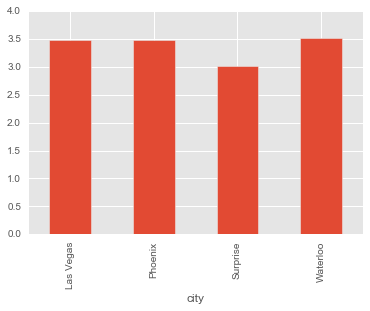

In [64]:
business.groupby('city')['stars'].mean().plot('bar')

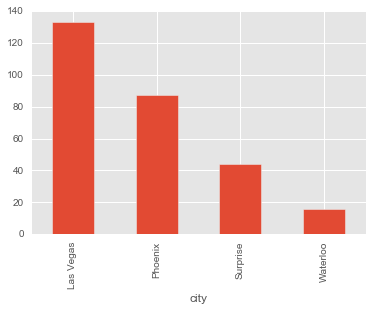

In [65]:
business.groupby('city')['review_count'].mean().plot('bar')

(3846, 168)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Different categories of ratings

---

Yelp is finally ready to admit that their rating system sucks. No one cares about the ratings, they just use the site to find out what's nearby. The ratings are simply too unreliable for people. 

Yelp hypothesizes that this is, in fact, because different people tend to give their ratings based on different things. They believe that perhaps some people always base their ratings on quality of food, others on service, and perhaps other categories as well. 

1. Do some users tend to talk about service more than others in reviews/tips? Divide up the tips/reviews into more "service-focused" ones and those less concerned with service.
2. Create two new ratings for businesses: ratings from just the service-focused reviews and ratings from the non-service reviews.
3. Construct a regression model for each of the two ratings. They should use the same predictor variables (of your choice). 
4. Validate the performance of the models.
5. Do the models coefficients differ at all? What does this tell you about the hypothesis that there are in fact two different kinds of ratings?

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Identifying "elite" users

---

Yelp, though having their own formula for determining whether a user is elite or not, is interested in delving deeper into what differentiates an elite user from a normal user at a broader level.

Use a classification model to predict whether a user is elite or not. Note that users can be elite in some years and not in others.

1. What things predict well whether a user is elite or not?
- Validate the model.
- If you were to remove the "counts" metrics for users (reviews, votes, compliments), what distinguishes an elite user, if anything? Validate the model and compare it to the one with the count variables.
- Think of a way to visually represent your results in a compelling way.
- Give a brief write-up of your findings.


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Find something interesting on your own

---

You want to impress your superiors at Yelp by doing some investigation into the data on your own. You want to do classification, but you're not sure on what.

1. Create a hypothesis or hypotheses about the data based on whatever you are interested in, as long as it is predicting a category of some kind (classification).
2. Explore the data visually (ideally related to this hypothesis).
3. Build one or more classification models to predict your target variable. **Your modeling should include gridsearching to find optimal model parameters.**
4. Evaluate the performance of your model. Explain why your model may have chosen those specific parameters during the gridsearch process.
5. Write up what the model tells you. Does it validate or invalidate your hypothesis? Write this up as if for a non-technical audience.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. ROC and Precision-recall

---

Some categories have fewer overall businesses than others. Choose two categories of businesses to predict, one that makes your proportion of target classes as even as possible, and another that has very few businesses and thus makes the target varible imbalanced.

1. Create two classification models predicting these categories. Optimize the models and choose variables as you see fit.
- Make confusion matrices for your models. Describe the confusion matrices and explain what they tell you about your models' performance.
- Make ROC curves for both models. What do the ROC curves describe and what do they tell you about your model?
- Make Precision-Recall curves for the models. What do they describe? How do they compare to the ROC curves?
- Explain when Precision-Recall may be preferable to ROC. Is that the case in either of your models?

## OOP, Stochastic Gradient Descent, and Linear Algebra

---

In this part of the project, you will implement machine learning algorithms we have covered in class from scratch. 

--- 

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6. Extend the `LinearRegrssion` class to include the following: 

- Calculate confidence intervals at X% on the $\beta$ coefficients and predicted y value when the model is not regularized. Here is a good overview of calculating confidence intervals: http://imgur.com/a/O1ZFk



- An option to regularize the model with Ridge Regression. The method should automatically calculate the best `alpha` for the user. The closed form solution for Ridge Regression may be helpful [Hint: Think of the `n_alphas` parameter in sklearn]

Protip: Compare if your implemenation works by applying it on the Diabetes Dataset and seeing it how it compares to opensource implemenations in `sklearn` and `statsmodels`. 

http://statsmodels.sourceforge.net/devel/examples/#regression

http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 7. Extend the `NearestNeighbor` class such that the fit method doesn't use a `for loop`


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 8. Implement `LogisticRegression` that fits the model using Stochastic Gradient Descent. 

Check if the results of your `LogisticRegression` implementation matches with the Sklearn implementation: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">
### 9. Singular Value Decomposition 

- Read articles on image compression with SVD and use `numpy` apply it to images from the MNIST Datasets. To get the MNIST Datset, use the following comands. Note that the `mnist` data has shape `(70000, 784)`. You will need to convert it to 28x28 images [Hint: `np.reshape`]. 
       
       from sklearn.datasets import fetch_mldata
       mnist = fetch_mldata('MNIST original', data_home=custom_data_home)

    https://inst.eecs.berkeley.edu/~ee127a/book/login/l_svd_apps_image.html

    http://www.frankcleary.com/svdimage/
    
    
- Apply Logistic Regression to classify MNIST Images. This may require having the images be `784` dimensions rather than `28x28`. Compare results of the classifier on a test set when you apply it on the raw dataset vs. the compressed version of dataset from SVD. 

## Optional: Interview Practice

## Coding Questions 
- Implement Binary Search in Python and write down the algorithmic complexity of the Binary Search Algorithm.


- Implement Merge Sort in Python [Hint: First implement the `merge` function that combines two sorted arrays into one sorted array linear time]. What is the time complexity of `mergesort` ?


- Find the closest pair from two sorted arrays. Given two sorted arrays and a number x, find the pair whose sum is closest to x and the pair has an element from each array. We are given two arrays ar1[0…m-1] and ar2[0..n-1] and a number x, we need to find the pair ar1[i] + ar2[j] such that absolute value of (ar1[i] + ar2[j] – x) is minimum. What is the time complexity of this algorithm?

## Probability  and Statistics Questions 

- In any 15-minute interval, there is a 20% probability that you will see at least one shooting star. What is the probability that you see at least one shooting star in the period of an hour?


- A certain couple tells you that they have two children, at least one of which is a girl. What is the probability that they have two girls?


## Interview Questions Related to Material

- Explain what is bias-variance tradeoff to a non-technical person. Why is it a useful framework? How do you detect bias in your models? How about you variance? 


- Explain why cross-validation is important. 


- What is regularization? What are the advantages/disadvantages of different types of regularization schemes? 


- What are the loss functions associated with linear regression, logistic regression, and KNN? 


- Can you give examples of feature engineering on datasets you have worked with? 